# Proyecto Final Curso Arboles de Decision y Random Forest

  Objetivo principal: Teniendo como referente la base de datos CENSUS INCOME, entrenar un algoritmo de Ramdom Forest para predecir si una persona ganarás mas de 50 mil dolares.
  Por: Guillermo David Hincapie Velez

In [1]:
# Cargamos las librerias para la iportacion de los datos
import pandas as pd

In [2]:
# Cargamos las bases de datos de google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Cargando la base de datos
df_census = pd.read_csv("/content/drive/MyDrive/Aprendizaje/Curso_Arboles_Desicion/Proyecto_Final_Platzy/adult.csv")

# Analisis Exploratorio de Datos

In [4]:
# Visualizacion de los datos
df_census.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [5]:
#Analizamos el shape del objeto
print(df_census.shape)

(32561, 15)


In [6]:
#Visualizamos los tipos de datos
df_census.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [7]:
# Revisando un poco la variable objetivo
df_census['income'].value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

In [8]:
#Verificamos valores missings
df_census.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [9]:
# Revisando las variables de interes
df_census.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

# Procesamiento de datos

In [10]:
# Antes de procesar los datos debemos cambiar el simbolo ? por un dato faltante
df_final = df_census.replace(['?'], float("nan"))

In [11]:
# Revisando la nueva base de datos
df_final.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,>50K


In [12]:
# Confirmando los NA`S
df_final.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [13]:
# Se eliminan los valores NA (no se aplican tecnicas de imputacion de datos faltantes)
df = df_final.dropna()

In [14]:
print(df.shape)

(30162, 15)


In [15]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,>50K
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,>50K
12,52,Private,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,0,2824,20,United-States,>50K


In [16]:
#Separamos en X e y
X = df.drop(['income'], axis = 1)
y = df['income']

In [17]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 5)

In [18]:
#Veamos que obtuvimos
X_train.shape, X_test.shape

((21113, 14), (9049, 14))

In [19]:
y_train.shape, y_test.shape

((21113,), (9049,))

# Entrenamiento de modelo de clasificación con árbol de decisión

In [20]:
pip install category-encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.7 MB/s eta 0:00:00


In [21]:
#Importante: todos nuestros tipos de datos son object, realizamos una transformacion
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols = ['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [22]:
#Verificamos la transformacion
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
3146,1,1,1,1,1,1,1,1,1,1,1,1,1,1
11433,2,1,2,2,2,1,2,1,1,1,2,1,2,1
11592,3,1,3,2,2,2,3,2,1,2,2,1,1,1
6443,4,1,4,2,2,1,4,1,1,1,2,1,1,1
22828,5,1,5,3,3,3,1,3,1,1,2,1,1,1


In [23]:
#Importar árbol de decisión
from sklearn.tree import DecisionTreeClassifier

#Creacion del modelo
tree = DecisionTreeClassifier(max_depth=2, random_state = 0)

In [24]:
#Entrenamiento
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [25]:
#Calculo de las predicciones en Train y Test
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

In [26]:
#Calculo de metricas
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)

#Calculo el accuracy en Test
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print('El accuracy en train es:', train_accuracy_tree)
print('El accuracy en test es:', test_accuracy_tree)

El accuracy en train es: 0.7663524842514091
El accuracy en test es: 0.7640623273289866


# Entrenamiento de modelo de clasificación con random forest

In [27]:
#Importar random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10, random_state =1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [28]:
#Calculo de las predicciones en Train y Test
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

In [29]:
#Calculo de metricas
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy_rf =accuracy_score(y_train, y_train_pred_rf)

#Calculo el accuracy en Test
test_accuracy_rf =accuracy_score(y_test, y_test_pred_rf)

print('El accuracy en train es:', train_accuracy_rf)
print('El accuracy en test es:', test_accuracy_rf)

El accuracy en train es: 0.9865012077866717
El accuracy en test es: 0.8262791468670572


In [30]:

features_scores = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending=False)
features_scores

fnlwgt            0.184178
age               0.140224
occupation        0.105079
relationship      0.104235
marital.status    0.101734
capital.gain      0.074261
hours.per.week    0.074041
education         0.053043
education.num     0.046485
workclass         0.038140
capital.loss      0.029200
sex               0.017296
native.country    0.017111
race              0.014974
dtype: float64

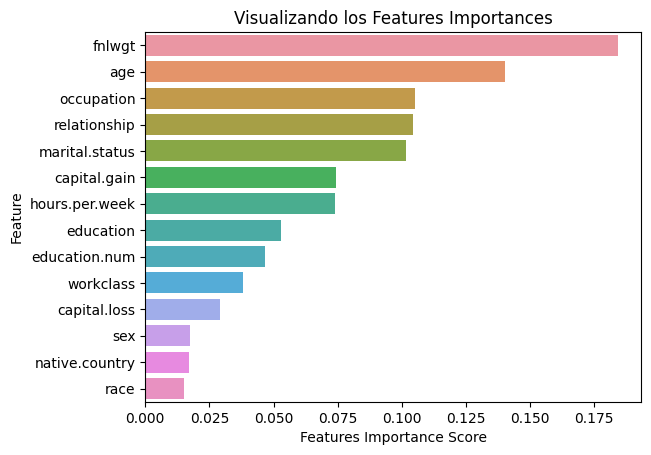

In [31]:
#Grafico de barras
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=features_scores , y = features_scores.index)
plt.xlabel('Features Importance Score')
plt.ylabel('Feature')
plt.title("Visualizando los Features Importances")
plt.show()

In [32]:
# Matriz de confusion del RF
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_test_pred_rf)

print('Matriz de Confusion\n\n', cm)

Matriz de Confusion

 [[6297  516]
 [1056 1180]]


In [33]:
#RF
from sklearn.metrics import classification_report

print(classification_report(y_test,y_test_pred_rf))

              precision    recall  f1-score   support

       <=50K       0.86      0.92      0.89      6813
        >50K       0.70      0.53      0.60      2236

    accuracy                           0.83      9049
   macro avg       0.78      0.73      0.74      9049
weighted avg       0.82      0.83      0.82      9049

